In [1]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
# (x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


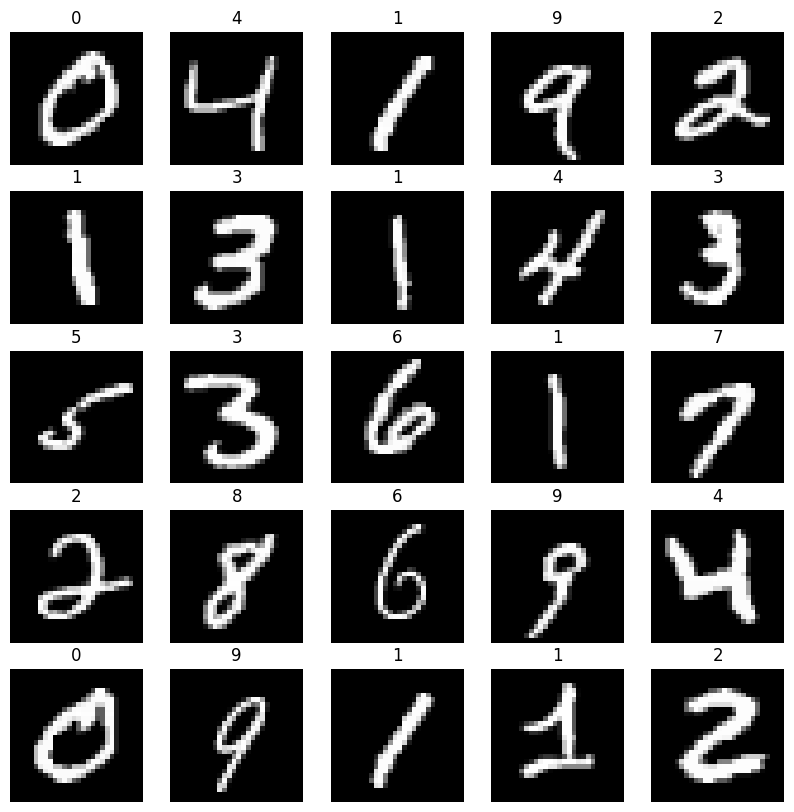

In [3]:
plt.figure(figsize = (10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i],cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [4]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
input_shape = (28,28,1)
num_classes = 10
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32,kernel_size = (3,3),activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(128,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes,activation='softmax')
    ]
)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
keras.utils.plot_model(model,to_file='MNIST_CNN.png',show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [8]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)   

In [9]:
history = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4607 - loss: 3.6420 - val_accuracy: 0.9615 - val_loss: 0.1321
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8996 - loss: 0.3281 - val_accuracy: 0.9740 - val_loss: 0.0827
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9417 - loss: 0.1916 - val_accuracy: 0.9843 - val_loss: 0.0504
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9581 - loss: 0.1410 - val_accuracy: 0.9847 - val_loss: 0.0498
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9658 - loss: 0.1124 - val_accuracy: 0.9878 - val_loss: 0.0388
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9719 - loss: 0.0915 - val_accuracy: 0.9893 - val_loss: 0.0378
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9764 - loss: 0.0760 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9809 - loss: 0

In [10]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0294


[0.023529592901468277, 0.9925000071525574]